D:\PycharmProjects\Interpritier\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


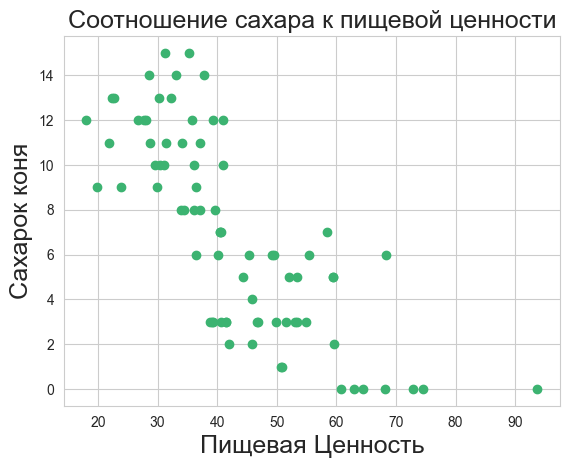

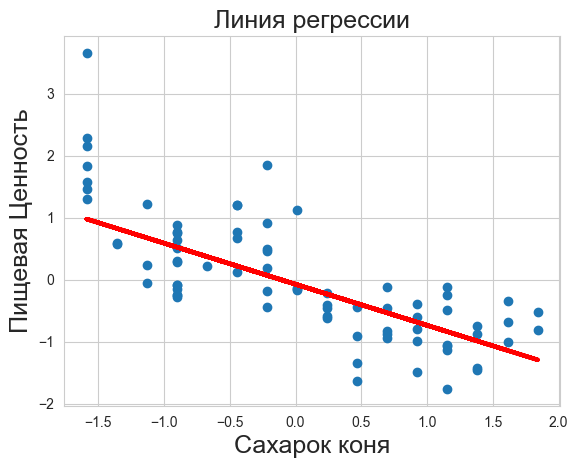

*** Коэффициенты регрессии ***
Наклон линии(направление зависимости) =  -0.6625788164810726
Изменение высоты относительно оси X) =  -0.07534148774986982
Метрики качества итд
Коэффициент детерминаци для обучающей выборки r^2 = 0.559
Коэффициент детерминаци для тестовой выборки r^2 = 0.472
Ошибка относительно среднего значения y = 0.544406727093629
Регрессионная квадратичная сумма 8.04402519797378
Квадратичная сумма ошибки 12.43588734874897
Общая квадратичная сумма 20.47991254672275
F-критерий 9.055755300240953
T-критерий = -10.344


In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import sem

excel = 'cereals.xlsx'
data = pd.read_excel(excel)
data = pd.read_csv('bebra.csv')
str_cols = data.select_dtypes(include=['object']).columns
df = data.drop(str_cols, axis=1)
fvalue = df['Сахар, г.']
target_value = df['Пищевая ценность']
# print(fvalue.corr(taget_value))
# some visualize
plt.scatter(target_value, fvalue, color='mediumseagreen')
plt.xlabel('Пищевая Ценность', fontsize=18)
plt.ylabel('Сахарок коня', fontsize=18)
plt.title('Соотношение сахара к пищевой ценности', fontsize=18)
plt.show()

# preprocessing
# df_target = df.loc[40:75, [value1, value2, target_value]]  # признаки для обучения если доебутся, строк и так мало
# типо алё, df.shape[0] сами гляньте скок блятб

df = pd.merge(fvalue, target_value, right_index=True, left_index=True)
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df))
# разобьем данные на обучающую и тестовую выборку
X = df.iloc[:, 0:1]
y = df.iloc[:, 1]  # целевая
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# prediction
model = LinearRegression()
model.fit(X_train, y_train)  # обучение на обучающей выборке
y_pred = model.predict(X_test)  # предсказанные данные на тестовой выборку
plt.scatter(X, y)
plt.xlabel('Сахарок коня', fontsize=18)
plt.ylabel('Пищевая Ценность', fontsize=18)
plt.plot( X,model.predict(X), color='red', linewidth=3)
plt.title('Линия регрессии', fontsize=18)
plt.show()
mse = mean_squared_error(y_pred, y_test)
mean_y = np.mean(y_test)
SSR = np.sum((y_pred - mean_y) ** 2)  # регрессионная квадратичная сумма
SSE = np.sum((y_test - y_pred) ** 2)  # квадратичная сумма ошибки
SST = SSR + SSE  # общая квадратичная сумма
corrs = df.corr()
n = X_test.shape[0]  # - число наблюдений
p = X_test.shape[1]
F = (SSR / p) / (SSE / (n - p - 1))
# metrice
print('*** Коэффициенты регрессии ***')
print('Наклон линии(направление зависимости) = ', *model.coef_)
print('Изменение высоты относительно оси X) = ',model.intercept_)
print('Метрики качества итд')
print('Коэффициент детерминаци для обучающей выборки r^2 =', round(model.score(X_train, y_train), 3))  # r^2
print('Коэффициент детерминаци для тестовой выборки r^2 =', round(model.score(X_test, y_test), 3))
print('Ошибка относительно среднего значения y =', mean_y)
print('Регрессионная квадратичная сумма', SSR)
print('Квадратичная сумма ошибки', SSE)
print('Общая квадратичная сумма', SST)
print('F-критерий', F)

for i, coef in enumerate(model.coef_):
    X_i = X_test.iloc[:, i]
    se_b_i = np.sqrt(mse / (n - p - 1)) / np.sqrt(np.sum((X_i - np.mean(X_i)) ** 2))
    t_stat = coef / se_b_i
    # p_value = 2 * (1 - sm.t.cdf(abs(t_stat), df=n - p - 1))
    print(f"T-критерий = {t_stat:.3f}")